In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats

seed = 42
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print(f'The number of Samples in this dataset is',df.shape[0],'with',df.shape[1],'features')

The number of Samples in this dataset is 418 with 12 features


In [4]:
#let's now convert all column namws to lower cases
df.columns=df.columns.str.lower()
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   survived     418 non-null    int64  
 2   pclass       418 non-null    int64  
 3   name         418 non-null    object 
 4   sex          418 non-null    object 
 5   age          332 non-null    float64
 6   sibsp        418 non-null    int64  
 7   parch        418 non-null    int64  
 8   ticket       418 non-null    object 
 9   fare         417 non-null    float64
 10  cabin        91 non-null     object 
 11  embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
pd.DataFrame(df.isnull().sum(),columns=["number of NAN values"])

,number of NAN values
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,86
sibsp,0
parch,0
ticket,0
fare,1


In [7]:
print(f'The number of duplicated samples in the dataset is/are',len(df[df.duplicated()]))

The number of duplicated samples in the dataset is/are 0


In [8]:
new_ages=df.groupby("sex")["age"].agg("mean")
new_ages

sex
female    30.272362
male      30.272732
Name: age, dtype: float64

In [9]:
df[["sex","age"]]

,sex,age
0,male,34.5
1,female,47.0
2,male,62.0
3,male,27.0
4,female,22.0
...,...,...
413,male,NaN
414,female,39.0
415,male,38.5
416,male,NaN


In [10]:
print(f'The number of missing values in the "Age" column is',df["age"].isnull().sum())
print('on percentage,that is %.2f%%' %(df["age"].isnull().sum()/df.shape[0]*100))

The number of missing values in the "Age" column is 86
on percentage,that is 20.57%


(-10.0, 80.0)

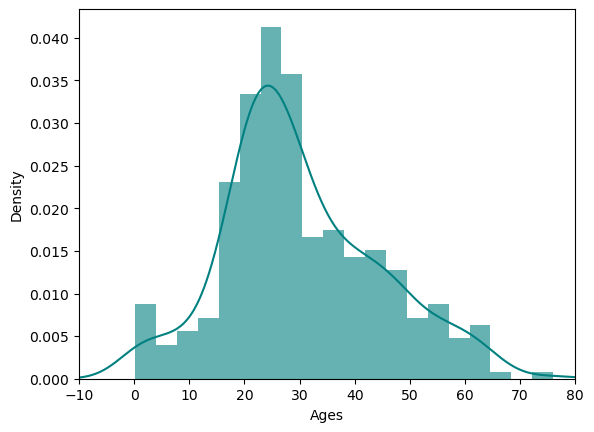

In [11]:
ax=df["age"].hist(bins=20,density=True,stacked=True,alpha=0.6,color="teal")
df["age"].plot(kind="density",color="teal")
plt.xlabel("Ages")
plt.xlim(-10,80)

In [12]:
df["age"].fillna(df["age"].median(),inplace=True)
df=df.drop("cabin",axis=1)

In [13]:
df2=df.copy()
df2["survived"]=df2["survived"].replace({
    0:"died",
    1:"survived"
})

In [14]:
df2["pclass"]=df2["pclass"].apply(lambda x:str(x))

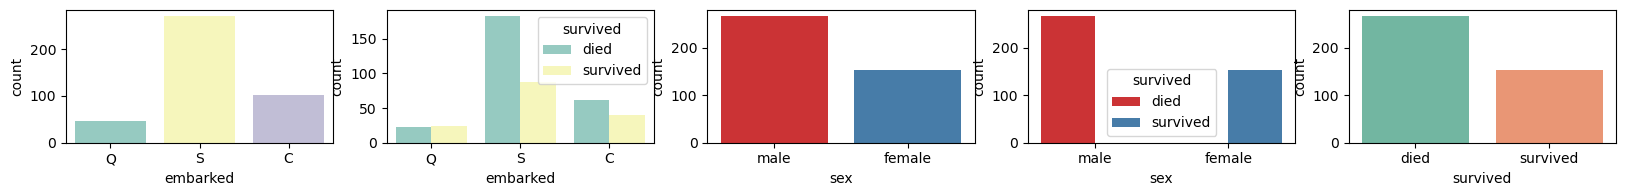

In [15]:
def visualization(df):
    plt.figure(figsize=(20,10))
    plt.subplot(5,5,1)
    sns.countplot(x="embarked",data=df,palette="Set3")
    
    
    plt.subplot(5,5,2)
    sns.countplot(x="embarked",data=df,palette="Set3",hue="survived")
  
    
    
    plt.subplot(5,5,3)
    sns.countplot(x="sex",data=df,palette="Set1") 
    
    plt.subplot(5,5,4)
    sns.countplot(x="sex",data=df,palette="Set1",hue="survived")
    
    plt.subplot(5,5,5)
    sns.countplot(x="survived",data=df,palette="Set2")
    
    plt.show()
    
    
visualization(df2)

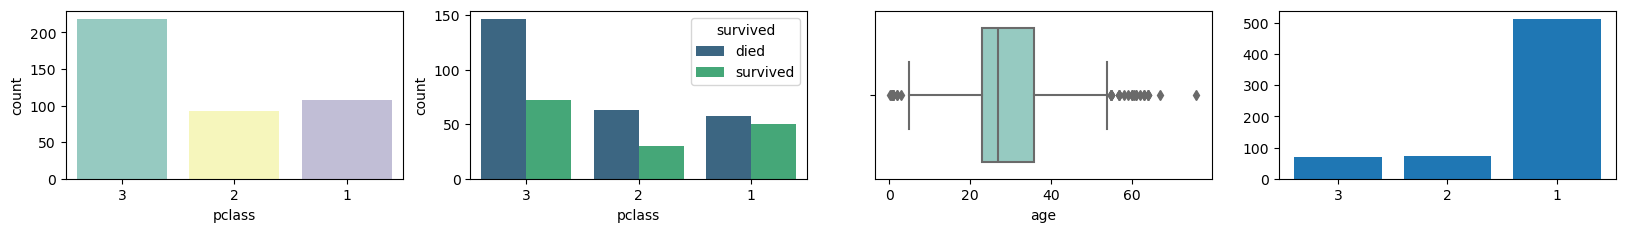

In [16]:
def visualization(df):
    plt.figure(figsize=(20,10))
    plt.subplot(4,4,1)
    sns.countplot(x="pclass",data=df,palette="Set3")
    
    
    plt.subplot(4,4,2)
    sns.countplot(x="pclass",data=df,palette="viridis",hue="survived")
  
    
    
    plt.subplot(4,4,3)
    sns.boxplot(x="age",data=df,palette="Set3")
   
    
    plt.subplot(4,4,4)
    plt.bar(x="pclass",height="fare",data=df,)
    
    plt.show()
    
    
visualization(df2)

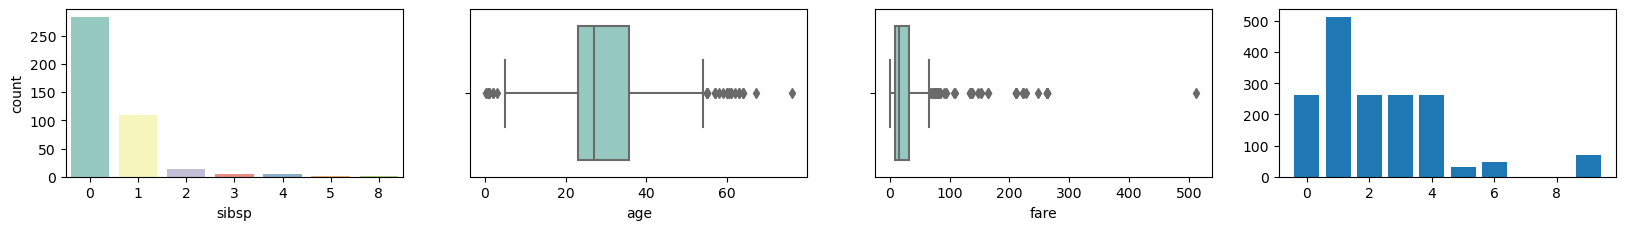

In [17]:
def visualization(df):
    plt.figure(figsize=(20,10))
    plt.subplot(4,4,1)
    sns.countplot(x="sibsp",data=df,palette="Set3")
  
    
    
    
    plt.subplot(4,4,2)
    sns.boxplot(x="age",data=df,palette="Set3")
    plt.subplot(4,4,3)
    sns.boxplot(x="fare",data=df,palette="Set3")
    
    plt.subplot(4,4,4)
    plt.bar(x="parch",height="fare",data=df,)
    
    plt.show()
    
    
visualization(df2)

In [18]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  417 non-null    int64  
 1   survived     417 non-null    int64  
 2   pclass       417 non-null    int64  
 3   name         417 non-null    object 
 4   sex          417 non-null    object 
 5   age          417 non-null    float64
 6   sibsp        417 non-null    int64  
 7   parch        417 non-null    int64  
 8   ticket       417 non-null    object 
 9   fare         417 non-null    float64
 10  embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


# OUTLIER REMOVAL FROM AGE

In [19]:
from scipy.stats import zscore
z_score=zscore(df[["age","fare"]])
z_score.columns=["age_2","fare_2"]
df=pd.concat([df,z_score],axis=1)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_2,fare_2
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.394417,-0.497811
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1.385449,-0.512660
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2.574688,-0.464532
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,-0.200203,-0.482888
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,-0.596616,-0.417971


# MODEL BUILDING

In [20]:
x=df[['pclass', 'sex', 'age', 'sibsp',
       'parch','fare', 'embarked']]
y=df["survived"]

In [21]:
x["sex"]=x["sex"].replace({
    "male":1,
    "female":0
})

x["embarked"]=x["embarked"].replace({
    "Q":1,
    "S":0,
    "C":2
})

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.4)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,HistGradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score


In [24]:
logistic=LogisticRegression()
ada=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
hist=HistGradientBoostingClassifier()
bag=BaggingClassifier()
ran=RandomForestClassifier()
ex=ExtraTreesClassifier()

tree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gus=GaussianProcessClassifier()

In [25]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f'The accuracy score for {name} algorithm is {round(score,2)}')

The accuracy score for Logistic algorithm is 1.0
The accuracy score for Adaboost algorithm is 1.0
The accuracy score for Hist algorithm is 1.0
The accuracy score for Bagging classifier algorithm is 1.0
The accuracy score for Random Forest algorithm is 1.0
The accuracy score for Extra trees algorithm is 1.0
The accuracy score for Decision Tree algorithm is 1.0
The accuracy score for K nearest Neighbor algorithm is 0.99
The accuracy score for Support Vector Machine algorithm is 0.99
The accuracy score for Gaussian algorithm is 0.99


In [26]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=accuracy_score(y_train,y_pred)
    print(f'The accuracy score for {name} algorithm is {round(score,2)}')

The accuracy score for Logistic algorithm is 1.0
The accuracy score for Adaboost algorithm is 1.0
The accuracy score for Hist algorithm is 1.0
The accuracy score for Bagging classifier algorithm is 1.0
The accuracy score for Random Forest algorithm is 1.0
The accuracy score for Extra trees algorithm is 1.0
The accuracy score for Decision Tree algorithm is 1.0
The accuracy score for K nearest Neighbor algorithm is 1.0
The accuracy score for Support Vector Machine algorithm is 1.0
The accuracy score for Gaussian algorithm is 1.0


In [27]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=cross_val_score(model,x_test,y_test,cv=100).mean()
    print(f'The accuracy score for {name} algorithm is {round(score,2)}')
    
    #cross_val_score(clf,x_test1,y_test1,cv=100).mean()

The accuracy score for Logistic algorithm is 1.0
The accuracy score for Adaboost algorithm is 1.0
The accuracy score for Hist algorithm is 1.0
The accuracy score for Bagging classifier algorithm is 1.0
The accuracy score for Random Forest algorithm is 1.0
The accuracy score for Extra trees algorithm is 1.0
The accuracy score for Decision Tree algorithm is 1.0
The accuracy score for K nearest Neighbor algorithm is 0.98
The accuracy score for Support Vector Machine algorithm is 1.0
The accuracy score for Gaussian algorithm is 1.0


In [28]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=classification_report(y_train,y_pred)
    print(f'\nThe classification report  for {name} algorithm is {score}')
  


The classification report  for Logistic algorithm is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00        86

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


The classification report  for Adaboost algorithm is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00        86

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


The classification report  for Hist algorithm is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00        86

    accuracy            

In [29]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=confusion_matrix(y_train,y_pred)
    print(f'\nThe confusion matrix for {name} algorithm is \n {score}')
  


The confusion matrix for Logistic algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Adaboost algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Hist algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Bagging classifier algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Random Forest algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Extra trees algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Decision Tree algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for K nearest Neighbor algorithm is 
 [[163   1]
 [  0  86]]

The confusion matrix for Support Vector Machine algorithm is 
 [[164   0]
 [  0  86]]

The confusion matrix for Gaussian algorithm is 
 [[164   0]
 [  0  86]]


In [30]:
models=[logistic,ada,hist,bag,ran,ex,tree,knn,svc,gus]
model_names=["Logistic","Adaboost","Hist","Bagging classifier",
            "Random Forest","Extra trees","Decision Tree","K nearest Neighbor","Support Vector Machine","Gaussian"]
for name,model in zip(model_names,models):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=roc_auc_score(y_train,y_pred)
    print(f'The accuracy score for {name} algorithm is {score}')

The accuracy score for Logistic algorithm is 1.0
The accuracy score for Adaboost algorithm is 1.0
The accuracy score for Hist algorithm is 1.0
The accuracy score for Bagging classifier algorithm is 1.0
The accuracy score for Random Forest algorithm is 1.0
The accuracy score for Extra trees algorithm is 1.0
The accuracy score for Decision Tree algorithm is 1.0
The accuracy score for K nearest Neighbor algorithm is 0.9969512195121951
The accuracy score for Support Vector Machine algorithm is 1.0
The accuracy score for Gaussian algorithm is 1.0


In [31]:
x_val=x_train[200:]
y_val=y_train[200:]

In [32]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import *

In [33]:
model=Sequential()
model.add(Dense(16,activation="relu",kernel_initializer="he_uniform",bias_initializer="zeros",input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform",bias_initializer="Ones"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_uniform"))
model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")
hist=model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.3886 - loss: 1.8439 - val_accuracy: 0.2800 - val_loss: 1.0240
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4790 - loss: 1.4385 - val_accuracy: 0.4400 - val_loss: 0.7428
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5352 - loss: 1.2219 - val_accuracy: 0.7800 - val_loss: 0.5750
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5689 - loss: 1.0933 - val_accuracy: 0.7600 - val_loss: 0.4771
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5879 - loss: 1.1427 - val_accuracy: 0.7600 - val_loss: 0.4124
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6173 - loss: 1.1391 - val_accuracy: 0.8000 - val_loss: 0.3614
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6315 - loss: 0.8951 - val_accuracy: 0.8800 - val_loss: 0.3191
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6432 - loss: 0.8408 - val_accuracy: 0.9000 - val_loss

In [34]:
train_acc=hist.history["accuracy"][-1]
train_acc

0.9800000190734863

In [35]:
val_accc=hist.history["val_accuracy"][-1]
val_accc

1.0

In [36]:
y_pred=model.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)
score=accuracy_score(y_test,y_pred)
score

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


1.0

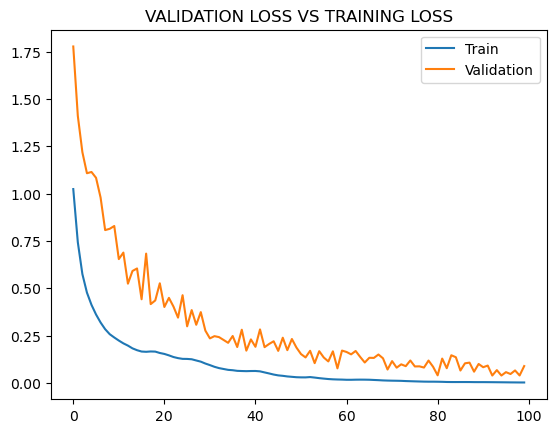

In [37]:
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["loss"])
plt.title("VALIDATION LOSS VS TRAINING LOSS")
plt.legend(["Train","Validation"],loc="upper right")

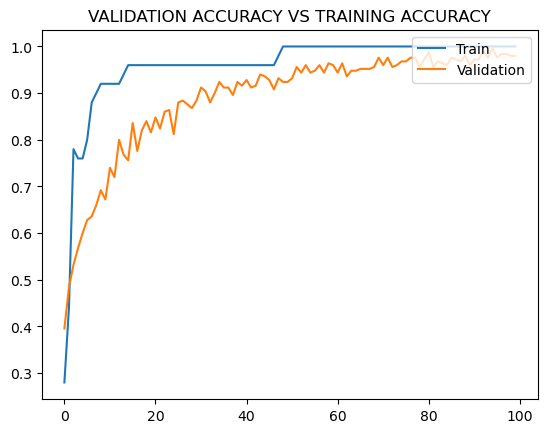

In [38]:
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["accuracy"])
plt.title("VALIDATION ACCURACY VS TRAINING ACCURACY")
plt.legend(["Train","Validation"],loc="upper right")

In [39]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
aucc=auc(fpr,tpr)
aucc

1.0

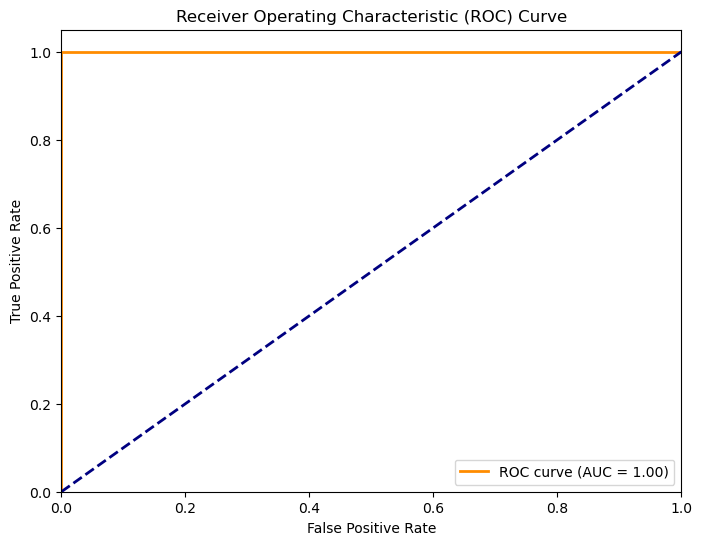

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(aucc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
